# Artificial Intelligence Image Classification using FastAI

This CoLab notebook is intended for medical professionals who does not have any significant background in programming or artificial intelligence. 



---



Goal:

Create an artificial intelligence model to predict wheather a blood cell smear is infected with malaria or not.

Data:

Orginally collected by NLM at NIH.
For a complete description go to [NIH website.](https://ceb.nlm.nih.gov/repositories/malaria-datasets/)

Optional

To understand more about the data and to compare results of different algorithms, please [read this.](https://towardsdatascience.com/diagnose-malaria-from-cellphone-captured-microscopic-images-using-fastai-library-and-turicreate-ae0e27d579e6) 


---





We use excel to enter data and create graphs and Word to create documents. 
Think of FastAI as a software to that helps us to perform artificial intelligence operations. 

First let us import fastai to our CoLab notebook. 


In [1]:

from torchvision.models import *
!pip install pretrainedmodels
import pretrainedmodels

from fastai.vision import *
from fastai.vision.models import *
from fastai.vision.learner import model_meta

!pip install utils

from utils import *
import sys

     |████████████████████████████████| 61kB 2.4MB/s 
  Stored in directory: /root/.cache/pip/wheels/69/df/63/62583c096289713f22db605aa2334de5b591d59861a02c2ecd
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built pretrainedmodels munch


Now we are going to use the 'wget' command to get the malaria microscope images from NIH website. It is stored as a ZIP file in the NIH server. 
If you want to run a command as if it is being run in command prompt / terminal use "!" before the command.

In [2]:
!wget https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip

--2019-06-08 15:18:54--  https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip
Resolving ceb.nlm.nih.gov (ceb.nlm.nih.gov)... 130.14.52.15, 2607:f220:41e:7052::15
Connecting to ceb.nlm.nih.gov (ceb.nlm.nih.gov)|130.14.52.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 353452851 (337M) [application/zip]
Saving to: ‘cell_images.zip’

cell_images.zip     100%[===================>] 337.08M  88.7MB/s    in 3.7s    

2019-06-08 15:18:58 (92.0 MB/s) - ‘cell_images.zip’ saved [353452851/353452851]



After executing the above line we should have a file called ‘cell_images.zip’ in our folder.

In the next line we are going to unzip the folder. 

This may take a few minutes.

In [0]:
!unzip cell_images.zip

In the following line we list all the files in our current directory to make sure that "cell_images" folder is present.

"ls "- command to list files in current directory

"cell_images" folder has 2 sub folders "Parasitized" and "Uninfected". These folder names will act as labels for the 2 classes of pictures in our AI model.

In [5]:
!ls

 cell_images	   FastAI_train.zip   mal5.jpg	    test_new.zip
 cell_images.zip   mal4.jpg	      sample_data
 FastAI_train	  'mal5 (1).jpg'      test_new


We set the "path" variable to the folder 'cell_images'

In [0]:
path = 'cell_images'

In the next line we load the 2 sets of images "Parasitized" and "Uninfected" into a variable called data.
We provide the path to our image files using the 'path' variable which we defined earlier. 

valid_pct=0.2 = This splits the data into 2 parts. 80% of the data will be used for training and 20% of data will be used to validation.  AI model is created using the training set. This model is tested on Validation to make sure that the . model is progressing in the right direction. 

ds_tfms = get_treansforms(), size =224 = This line apply different tranformation like vertical and horizontal flips to the images in our database and resizes all images to 224 X 224. 

In [0]:
tfms=get_transforms(do_flip=True, flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0)

In [0]:
data = ImageDataBunch.from_folder(path, 
                              ds_tfms=tfms, size=224,bs=32,
                               valid_pct=0.2
                              ).normalize(imagenet_stats)


Lets see how many images are in the training and validation sets


In [12]:

print('Train size:', len(data.train_ds))
print('Valid size:', len(data.valid_ds))

Train size: 22047
Valid size: 5511


Now let's look at some of the images. A you can see "Parasitized" cells has inclusions inside the cell.

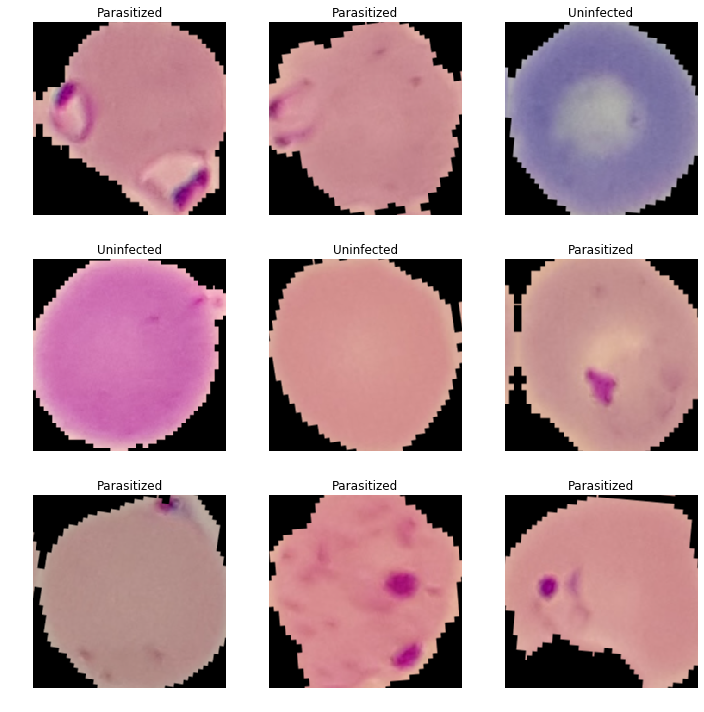

In [13]:

data.show_batch(rows=3, figsize=(10,10))

In the next line we are going to create the acutal AI model.

Just like we can use different cars (with different horse pwers, passenger capacity etc) to get from point A to point B we can use different  AI architectures to train an AI model. Here we are using a model called Resnet50. 

We are going to use transfer learning. In transfer learning we are using a model trained on millions of images and transfer that knowlwdge into our initial model and fine tune this to meet our requirement - find cells infected with malaria. 

metrics = accuracy - here we are using "accuracy" as our metric to be displayed. 

callback_fns=ShowGraph - this will plot a training and validation graph. 


In [0]:
from fastai.vision.models.cadene_models import dpn92

In [0]:

learn = cnn_learner(data,dpn92, pretrained=True, metrics= accuracy, callback_fns=ShowGraph).to_fp16()


We are fine tuning our model to our data in the following line. We are iterating 5 times over our entire data. 

1e-02 is the learning rate we are using. 

Hang in there, this is going to take a few minutes.

epoch,train_loss,valid_loss,accuracy,time
0,0.190367,0.281502,0.900744,05:00
1,0.169630,0.120176,0.960443,04:53
2,0.137797,0.096438,0.967157,04:51
3,0.133646,0.085508,0.968790,04:50
4,0.105018,0.079646,0.972963,04:49
5,0.095313,0.076241,0.974778,04:49


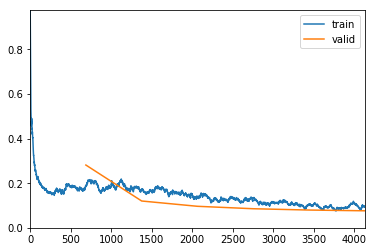

In [19]:
learn.fit_one_cycle(6, 1e-02)

Looks like we got an accuracy of 97.18%. 

in the next few lines we will plot a confusion matrix. 

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

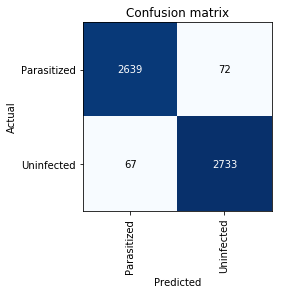

In [21]:
interp.plot_confusion_matrix()

In [0]:
learn.unfreeze()

In [0]:
bs = 16

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


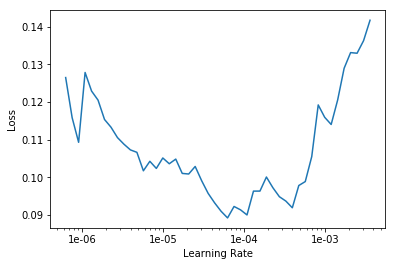

In [25]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.101716,0.084696,0.968245,06:13
1,0.097651,0.082114,0.972056,06:12
2,0.093855,0.087089,0.971512,06:11
3,0.076051,0.071948,0.974596,06:11
4,0.089466,0.071112,0.975141,06:11
5,0.082087,0.067322,0.978225,06:10
6,0.087414,0.066743,0.976955,06:10
7,0.080031,0.065959,0.977862,06:10


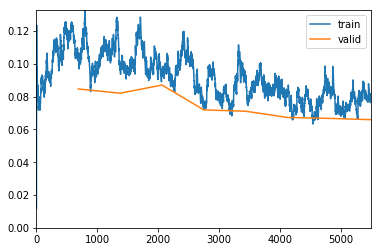

In [26]:
learn.fit_one_cycle(8, slice(7e-5,3e-5), pct_start=0.05)

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

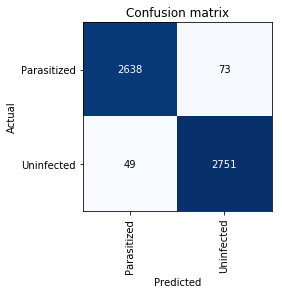

In [28]:
interp.plot_confusion_matrix()

To acess FastAI tutorial, [click here.](https://course.fast.ai/)


---



An article on learning rate can be [accessed here.](https://towardsdatascience.com/understanding-learning-rates-and-how-it-improves-performance-in-deep-learning-d0d4059c1c10)